In [11]:
# http://gluon.mxnet.io/chapter02_supervised-learning/linear-regression-gluon.html

In [12]:
import mxnet as mx
from mxnet import nd, autograd, gluon

In [13]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

In [14]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = nd.random_normal(shape=(num_examples, num_inputs))
noise = 0.01 * nd.random_normal(shape=(num_examples,))
y = real_fn(X) + noise

In [15]:
batch_size = 4
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y),
                                      batch_size=batch_size, shuffle=True)

In [16]:
net = gluon.nn.Dense(1, in_units=2)

In [17]:
print(net.weight)
print(net.bias)

Parameter dense1_weight (shape=(1, 2), dtype=<class 'numpy.float32'>)
Parameter dense1_bias (shape=(1,), dtype=<class 'numpy.float32'>)


In [18]:
print(net.collect_params())

dense1_ (
  Parameter dense1_weight (shape=(1, 2), dtype=<class 'numpy.float32'>)
  Parameter dense1_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)


In [19]:
type(net.collect_params())

mxnet.gluon.parameter.ParameterDict

In [20]:
# net(nd.array([[0,1]]))

In [21]:
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)

In [22]:
example_data = nd.array([[4,7]])
net(example_data)


[[-6.18163586]]
<NDArray 1x1 @cpu(0)>

In [23]:
print(net.weight.data())
print(net.bias.data())


[[-0.21137457 -0.76230538]]
<NDArray 1x2 @cpu(0)>

[ 0.]
<NDArray 1 @cpu(0)>


In [24]:
net = gluon.nn.Dense(1)
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)

In [25]:
square_loss = gluon.loss.L2Loss()

In [26]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.0001})

In [28]:
epochs = 10
loss_sequence = []
num_batches = num_examples / batch_size

for e in range(epochs):
    cumulative_loss = 0
    # inner loop
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx)
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        trainer.step(batch_size)
        cumulative_loss += nd.mean(loss).asscalar()
    print("Epoch %s, loss: %s" % (e, cumulative_loss / num_examples))
    loss_sequence.append(cumulative_loss)

Epoch 0, loss: 3.82307712597
Epoch 1, loss: 2.31593618177
Epoch 2, loss: 1.40297343557
Epoch 3, loss: 0.84992506567
Epoch 4, loss: 0.514895930188
Epoch 5, loss: 0.311937999961
Epoch 6, loss: 0.188985727648
Epoch 7, loss: 0.11449979365
Epoch 8, loss: 0.0693741997862
Epoch 9, loss: 0.0420362243155


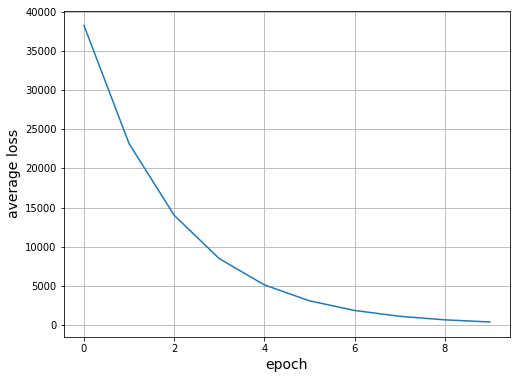

In [29]:

# plot the convergence of the estimated loss function
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('average loss',fontsize=14)